In [1]:
from asyncio.windows_events import NULL
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


data = pd.read_csv("BRCA.csv")
print(data.head())


       Hasta_ID  Yas Cinsiyet  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD   36    KADIN  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX   43    KADIN -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079   69    KADIN  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR   56    KADIN  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF   56    KADIN  0.221550   1.90680   0.52045 -0.311990   

  Tümör_Evre                      Histoloji ER durumu PR durumu HER2 durumu  \
0        III  Infiltrating Ductal Carcinoma   Pozitif   Pozitif     Negatif   
1         II             Mucinous Carcinoma   Pozitif   Pozitif     Negatif   
2        III  Infiltrating Ductal Carcinoma   Pozitif   Pozitif     Negatif   
3         II  Infiltrating Ductal Carcinoma   Pozitif   Pozitif     Negatif   
4         II  Infiltrating Ductal Carcinoma   Pozitif   Pozitif     Negatif   

                 Ameliyat_Tipi Ameliyat_Tarihi Son_Ziyaret_Tarihi Hasta_Durumu  
0  Mo

In [2]:
print(data.isnull().sum())

Hasta_ID              0
Yas                   0
Cinsiyet              0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tümör_Evre            0
Histoloji             0
ER durumu             0
PR durumu             0
HER2 durumu           0
Ameliyat_Tipi         0
Ameliyat_Tarihi       0
Son_Ziyaret_Tarihi    0
Hasta_Durumu          0
dtype: int64


In [3]:
data.info()
print("Veri setinin boyutu")
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hasta_ID            334 non-null    object 
 1   Yas                 334 non-null    int64  
 2   Cinsiyet            334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tümör_Evre          334 non-null    object 
 8   Histoloji           334 non-null    object 
 9   ER durumu           334 non-null    object 
 10  PR durumu           334 non-null    object 
 11  HER2 durumu         334 non-null    object 
 12  Ameliyat_Tipi       334 non-null    object 
 13  Ameliyat_Tarihi     334 non-null    object 
 14  Son_Ziyaret_Tarihi  334 non-null    object 
 15  Hasta_Durumu        334 non-null    object 
dtypes: float

KADIN    330
ERKEK      4
Name: Cinsiyet, dtype: int64


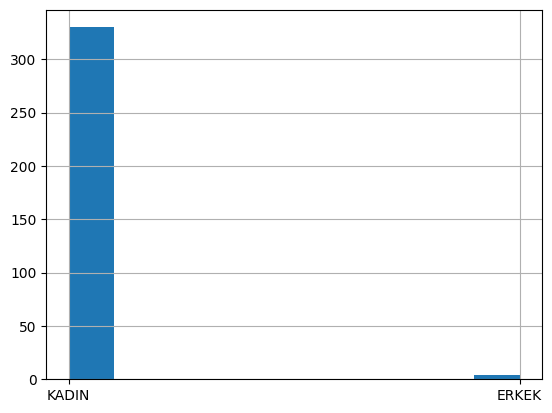

In [4]:
print(data.Cinsiyet.value_counts()) 
data.Cinsiyet.hist()
plt.show()

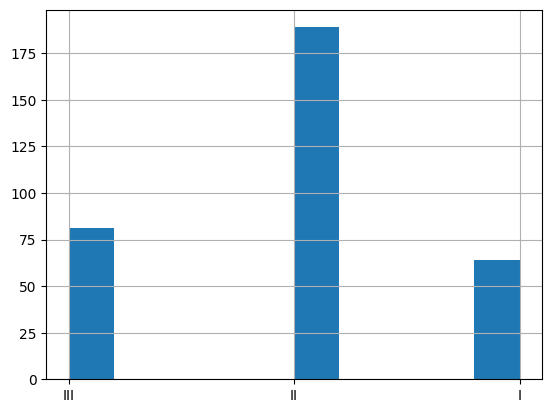

In [5]:
stage = data["Tümör_Evre"].value_counts()
transactions = stage.index
quantity= stage.values
figure = px.pie(data, 
             values=quantity,
             names=transactions, hole = 0.5,
             title="Hastalardaki tümörün evreleri" )
figure.show()
data.Tümör_Evre.hist()
plt.show()

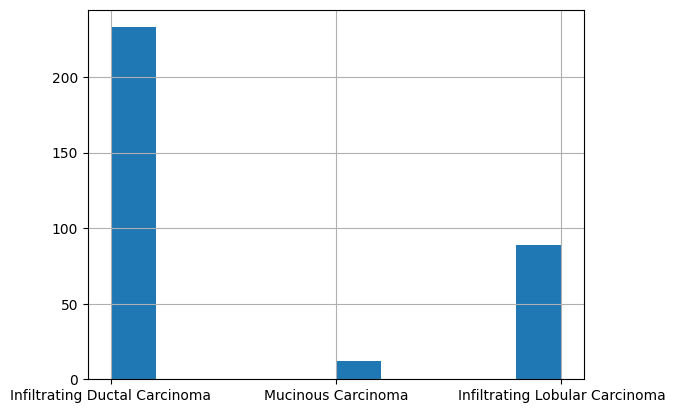

In [6]:
histology = data["Histoloji"].value_counts()
transactions = histology.index
quantity = histology.values
figure = px.pie(data,
                values=quantity,
                names=transactions, hole = 0.5,
                title="Hastalarin histolojisi ")
figure.show()
data.Histoloji.hist()
plt.show()

In [7]:
#Hastaların ER, PR ve HER2 durumuna bakıyoruz
print ( data [ "ER durumu" ]. value_counts())
print ( data [ "PR durumu" ]. value_counts())
print ( data ["HER2 durumu" ]. value_counts())

Pozitif    334
Name: ER durumu, dtype: int64
Pozitif    334
Name: PR durumu, dtype: int64
Negatif    305
Pozitif     29
Name: HER2 durumu, dtype: int64


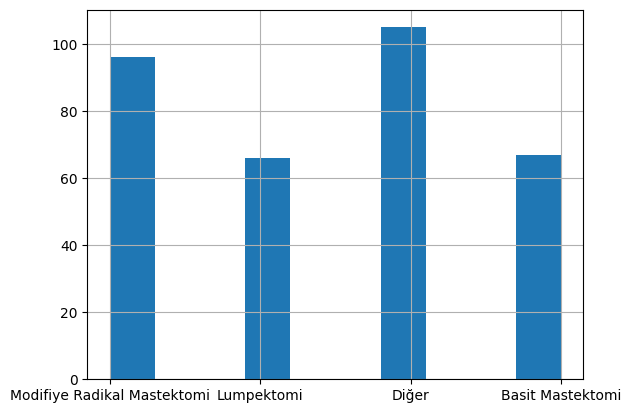

In [8]:
surgery = data["Ameliyat_Tipi"].value_counts()
transactions = surgery.index
quantity = surgery.values
figure = px.pie(data,
            values=quantity,
            names=transactions, hole=0.5,
            title="Hastaların olduğu ameliyat türleri")
figure.show()
data.Ameliyat_Tipi.hist()
plt.show()

In [9]:
#Kullandığımız veri kümesinin birçok kategorik özelliği olduğundan bu verileri makine öğrenimi modelini eğitmede kullanmalıyız. Bu yüzden tüm kategorik sütunların değerlerini dönüştürüyoruz

data["Tümör_Evre"] = data["Tümör_Evre"].map({"I": 1, "II": 2, "III": 3})
data["Histoloji"] = data["Histoloji"].map({"Infiltrating Ductal Carcinoma": 1,"Infiltrating Lobular Carcinoma": 2, "Mucinous Carcinoma": 3})
data["ER durumu"] = data["ER durumu"].map({"Pozitif": 1})
data["PR durumu"] = data["PR durumu"].map({"Pozitif": 1})
data["HER2 durumu"] = data["HER2 durumu"].map({"Pozitif": 1, "Negatif": 2})
data["Cinsiyet"] = data["Cinsiyet"].map({"ERKEK": 0, "KADIN": 1})
data["Ameliyat_Tipi"] = data["Ameliyat_Tipi"].map({"Diğer": 1, "Modifiye Radikal Mastektomi": 2, 
                                                 "Lumpektomi": 3, "Basit Mastektomi": 4})
print(data.head())

       Hasta_ID  Yas  Cinsiyet  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD   36         1  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX   43         1 -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079   69         1  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR   56         1  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF   56         1  0.221550   1.90680   0.52045 -0.311990   

   Tümör_Evre  Histoloji  ER durumu  PR durumu  HER2 durumu  Ameliyat_Tipi  \
0           3          1          1          1            2              2   
1           2          3          1          1            2              3   
2           3          1          1          1            2              1   
3           2          1          1          1            2              2   
4           2          1          1          1            2              1   

  Ameliyat_Tarihi Son_Ziyaret_Tarihi Hasta_Durumu  
0      15-Ocak-17      19-Haziran-

In [10]:
#Hayatta kalma tahmini için makine öğrenimi modelini eğitebiliriz. Modeli eğitmeden önce elimizdeki verileri eğitim ve test olarak ayiriyoruz.
#Veri kümesinin eğitim ve test verileri olarak ayrılması

x = np.array(data[['Yas', 'Cinsiyet','Protein1','Protein2','Protein3','Protein4','Tümör_Evre', 'Histoloji', 'ER durumu', 'PR durumu','HER2 durumu','Ameliyat_Tipi']])
y = np.array(data[['Hasta_Durumu']]).ravel()
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)


In [11]:
#SVC makine öğrenimi
model = SVC()
model.fit(xtrain, ytrain)


SVC()

In [12]:
#KNN için
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

data = load_iris()
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=7)

In [13]:
#LOGİSTİC REGRESSİON
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
#giriş çıkış değikenleri oluşturuyoruz
input=np.arange(10).reshape(-1,1)
output=np.array([0,0,0,0,1,1,1,1,1,1])

model= LogisticRegression(solver='liblinear',random_state=0)
model.fit(input,output)

LogisticRegression(random_state=0, solver='liblinear')

In [14]:
#SVC
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
xtrain_std =sc.transform(xtrain)
xtest_std = sc.transform(xtest)

from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(xtrain,ytrain)
y_pred = classifier.predict(xtest)

In [15]:
#LOGİSTİC REGRESYON
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain_std,ytrain)
prediction = lr.predict(xtest_std)
from sklearn.metrics import classification_report

In [16]:
#HASTANIN HAYATTA KALMA SONUCU LOGİSTİC REGRESYON İLE
print(classification_report(ytest, prediction))

              precision    recall  f1-score   support

     Hayatta       0.79      0.96      0.87        27
         Ölü       0.00      0.00      0.00         7

    accuracy                           0.76        34
   macro avg       0.39      0.48      0.43        34
weighted avg       0.63      0.76      0.69        34



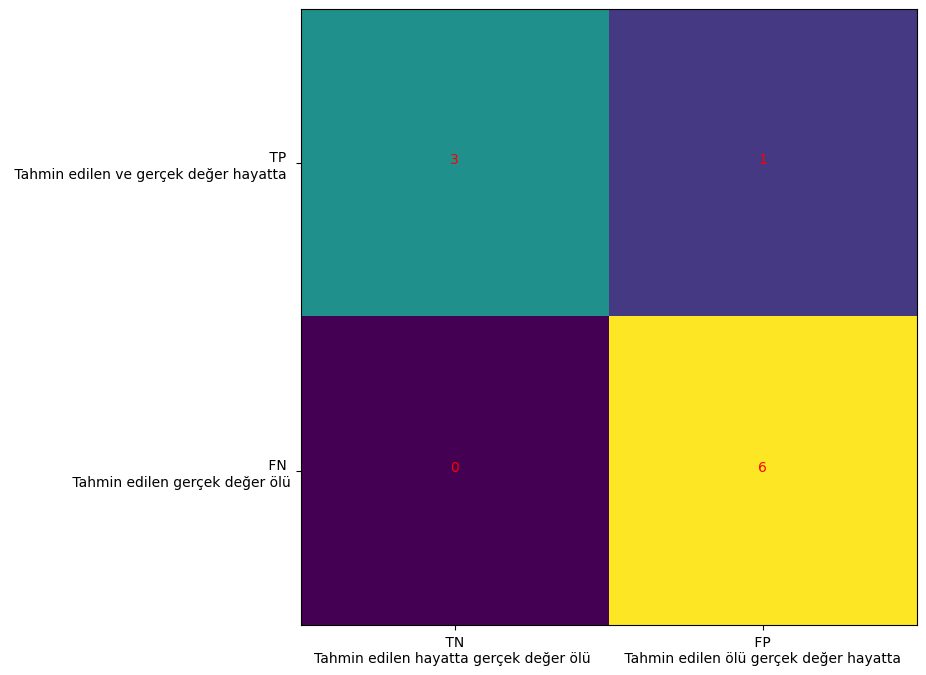

In [17]:
#CONFUSİON MATRİS
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(output,model.predict(input))
cm = confusion_matrix(output, model.predict(input))
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=(' TN \nTahmin edilen hayatta gerçek değer ölü ', ' FP \n Tahmin edilen ölü gerçek değer hayatta '))
ax.yaxis.set(ticks=(0,1),ticklabels=(' TP \n Tahmin edilen ve gerçek değer hayatta ',' FN \n Tahmin edilen gerçek değer ölü'))
ax.set_ylim(1.5, -0.5)
for i in range (2):
   for j in range (2):
     ax.text(j,i, cm[i,j], ha='center',color='red')
plt.show()

In [18]:
#Özellikleri girilen kişinin hayatta olup olmadığını öğrenmek için
model =SVC()
model.fit(xtrain,ytrain)
features = np.array([[36.0, 1, 0.080353, 0.42638, 0.54715, 0.273680, 3, 1, 1, 1, 2, 2,]])
sonuc = model.predict(features) 
print(sonuc)

['Hayatta']


In [19]:
#Çeşitli makine öğrenimi algoritmaları sayısal girdi verileri gerektirir. Bu nedenle kategorik sütunları sayısal bir sütunda temsil etmeliyiz.
#Tümör evre bizim birinci özelliğimiz ameliyat tipi de ikinci özelliğimiz buna göre hayatta kalma durumuna bakacağız


tumorEvre=['II','II','III','II','II','III','II','III','II','II','II','II','I','II','II','I','II','II','II','III']
ameliyatTipi=['Modifiye Radikal Mastektomi','Lumpektomi','Diğer','Modifiye Radikal Mastektomi','Diğer','Modifiye Radikal Mastektomi','Basit Mastektomi','Basit Mastektomi','Modifiye Radikal Mastektomi','Diğer','Lumpektomi','Diğer','Basit Mastektomi','Basit Mastektomi','Modifiye Radikal Mastektomi','Basit Mastektomi','Modifiye Radikal Mastektomi','Basit Mastektomi','Lumpetomi','Lumpektomi']
hastaDurumu=['Hayatta','Ölü','Hayatta','Hayatta','Ölü','Hayatta','Hayatta','Ölü','Hayatta','Hayatta','Ölü','Hayatta','Hayatta','Hayatta','Hayatta','Hayatta','Hayatta','Ölü','Hayatta','Hayatta']

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
tumorEvre_encoded=le.fit_transform(tumorEvre)
print(tumorEvre_encoded)
ameliyatTipi_encoded=le.fit_transform(ameliyatTipi)
print(ameliyatTipi_encoded)
hastaDurumu_encoded=le.fit_transform(hastaDurumu)
print(hastaDurumu_encoded)

[1 1 2 1 1 2 1 2 1 1 1 1 0 1 1 0 1 1 1 2]
[4 2 1 4 1 4 0 0 4 1 2 1 0 0 4 0 4 0 3 2]
[0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0]


In [20]:
#dize etiketkerini sayılara dönüştürme
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
ameliyatTipi_encoded=le.fit_transform(ameliyatTipi)
label=le.fit_transform(hastaDurumu)

#tümör evre ve ameliyat tipini aynı demet listesinde birleştirmek
features=list(zip(tumorEvre_encoded,ameliyatTipi_encoded))

from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=3)

In [21]:
#Burada tümör 1. evredeyken ameliyat tiplerine göre hastanın hayatta kalıp kalmamasının başarımını ölçtük
model.fit(features,label)
predicted=model.predict([[0,1],[0,2],[0,3],[0,4]])
print(predicted)

[0 1 0 0]


In [22]:
#Burada tümör 2. evredeyken ameliyat tiplerine göre hastanın hayatta kalıp kalmamasının başarımını ölçtük
predicted=model.predict([[1,1],[1,2],[1,3],[1,4]])
print(predicted)

[0 1 0 0]


In [23]:
#Burada tümör 3. evredeyken ameliyat tiplerine göre hastanın hayatta kalıp kalmamasının başarımını ölçtük
predicted=model.predict([[2,1],[2,2],[2,3],[2,4]])
print(predicted)

[1 0 0 0]


In [24]:
#KNN 1 için başarım
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain, ytrain)
y_pred=knn.predict(xtest)

from sklearn import metrics
print("Accuary:", metrics.accuracy_score(ytest,y_pred))


Accuary: 0.8235294117647058


In [25]:
#KNN 2 için başarım
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=2)
knn.fit(xtrain, ytrain)
y_pred=knn.predict(xtest)

from sklearn import metrics
print("Accuary:", metrics.accuracy_score(ytest,y_pred))


Accuary: 0.7647058823529411


In [26]:
#KNN 7 için başarım
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain, ytrain)
y_pred=knn.predict(xtest)

from sklearn import metrics
print("Accuary:", metrics.accuracy_score(ytest,y_pred))

Accuary: 0.7941176470588235


In [27]:
#HİLL CLİMBİNG OPTİMİZASYON
import numpy as np

N = 12 #Problem boyutu
def objective_function(solution):
    return np.sum(solution)  
def neighborhood_function(solution):
    temp_sol = solution.copy()
    rastgele_indis = np.random.randint(0,N)
    temp_sol[rastgele_indis] = ~temp_sol[rastgele_indis] 
    return temp_sol

cozum = np.random.random(N)>0.5
cozumun_degeri = objective_function(cozum)
for i in range(100):
    yeni_cozum = neighborhood_function(cozum)
    yeni_deger = objective_function(yeni_cozum)
    
    if yeni_deger > cozumun_degeri:
        cozum = yeni_cozum
        cozumun_degeri = yeni_deger   
    print(cozumun_degeri)


6
6
7
7
8
8
8
9
9
9
9
9
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12


In [31]:
#SİMULATED ANNEALİNG OPTİMİZASYONU
from pickle import OBJ
import numpy as np
import random
import math

N = 12 #Problem boyutu
def objective_function(sol):
    return np.sum(sol)  
def neighborhood_function(sol):
    tempSol = sol.copy()
    rastgele_indis = np.random.randint(0,N)
    tempSol[rastgele_indis] = ~tempSol[rastgele_indis] 
    return tempSol

Solution = np.random.random(N)>0.5
Solution_value = objective_function(Solution)
for i in range(100):
    new_Solution = neighborhood_function(Solution)
    new_value = objective_function(new_Solution)
    if new_value > Solution_value:
            Solution_value = OBJ(Solution)
            new_value = neighborhood_function(new_Solution)
            p = pow(math.e, (- new_value - Solution_value)/tempSol)
    if(new_value < Solution_value or random.random()<p):
        Solution_value=new_Solution
        print(Solution_value)
   
       

[False False  True  True  True False False  True False  True False  True]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [35]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)

x = pd.DataFrame(x)
y = pd.DataFrame(y)

def objective_function(solution):
    if(sum(solution) == 0):
        return 0
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(xtrain.loc[:,solution],ytrain)
    score = model.score(xtest.loc[:,solution], ytest)
    print(score)
    return score
best_objective = 0
for i in range(1000):
    solution = np.random.random(12)>0.5
    sol_objective = objective_function(solution)    
    if(sol_objective>best_objective):
        best_solution = solution.copy()
        best_objective = sol_objective


# her seferinde 1000 kere çıkan kesinlik sonucunu hangisi en iyi değerse(başta 0 verdi) rastgele arttırıyor bi öncekş en iyi değerle karşılaştırır

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

0.7647058823529411
0.6176470588235294
0.6764705882352942
0.7941176470588235
0.7647058823529411
0.7647058823529411
0.7352941176470589
0.7058823529411765
0.7058823529411765
0.7058823529411765
0.6176470588235294
0.7647058823529411
0.5882352941176471
0.7058823529411765
0.7352941176470589
0.7352941176470589
0.7941176470588235
0.7647058823529411
0.7647058823529411
0.7352941176470589
0.7647058823529411
0.7352941176470589
0.7352941176470589
0.7647058823529411
0.7352941176470589
0.7352941176470589
0.6470588235294118
0.6764705882352942
0.7941176470588235
0.7352941176470589
0.7647058823529411
0.7352941176470589
0.7352941176470589
0.8235294117647058
0.7352941176470589
0.7352941176470589
0.6176470588235294
0.7941176470588235
0.5882352941176471
0.7058823529411765
0.7352941176470589
0.7352941176470589
0.7647058823529411
0.7647058823529411
0.7352941176470589
0.6176470588235294
0.7941176470588235
0.7941176470588235
0.7352941176470589
0.7941176470588235
0.7941176470588235
0.7941176470588235
0.7647058823

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

0.6470588235294118
0.7352941176470589
0.7352941176470589
0.7058823529411765
0.7352941176470589
0.7352941176470589
0.7647058823529411
0.7352941176470589
0.7058823529411765
0.7647058823529411
0.7647058823529411
0.6470588235294118
0.6176470588235294
0.7941176470588235
0.6176470588235294
0.7352941176470589
0.7352941176470589
0.6764705882352942
0.7941176470588235
0.7352941176470589
0.7058823529411765
0.7647058823529411
0.7647058823529411
0.7058823529411765
0.7647058823529411
0.7647058823529411
0.7058823529411765
0.7647058823529411
0.5588235294117647
0.7352941176470589
0.7941176470588235
0.7058823529411765
0.7647058823529411
0.7647058823529411


C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

0.7941176470588235
0.7058823529411765
0.7647058823529411
0.7941176470588235
0.7058823529411765
0.5882352941176471
0.6764705882352942
0.6470588235294118
0.7352941176470589
0.7647058823529411
0.7058823529411765
0.7352941176470589
0.7352941176470589
0.7352941176470589
0.7058823529411765
0.7352941176470589
0.7647058823529411
0.6176470588235294
0.7647058823529411
0.7352941176470589
0.5588235294117647
0.6470588235294118
0.7941176470588235
0.7647058823529411
0.5588235294117647
0.7647058823529411
0.7352941176470589


C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

0.7352941176470589
0.7647058823529411
0.7647058823529411
0.7647058823529411
0.7352941176470589
0.7941176470588235
0.7352941176470589
0.5882352941176471
0.7352941176470589
0.7352941176470589
0.7941176470588235
0.7647058823529411
0.6470588235294118
0.6470588235294118
0.7647058823529411
0.5882352941176471
0.7647058823529411
0.7941176470588235
0.8235294117647058
0.6176470588235294
0.7941176470588235
0.8235294117647058
0.7352941176470589
0.8235294117647058
0.7647058823529411
0.7647058823529411
0.7352941176470589
0.7941176470588235
0.6470588235294118
0.5882352941176471
0.6470588235294118


C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

0.7647058823529411
0.6470588235294118
0.6176470588235294
0.7941176470588235
0.8235294117647058
0.7941176470588235
0.6176470588235294
0.6764705882352942
0.7647058823529411
0.7352941176470589
0.7941176470588235
0.7647058823529411
0.7941176470588235
0.7352941176470589
0.7352941176470589
0.7647058823529411
0.23529411764705882
0.6470588235294118
0.7352941176470589
0.7941176470588235
0.7352941176470589
0.7647058823529411
0.6176470588235294
0.7352941176470589
0.7352941176470589
0.8235294117647058
0.7058823529411765
0.7647058823529411
0.7941176470588235
0.7941176470588235


C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

0.7352941176470589
0.7058823529411765
0.7647058823529411
0.7941176470588235
0.7647058823529411
0.7647058823529411
0.7352941176470589
0.7058823529411765
0.6764705882352942
0.7941176470588235
0.7352941176470589
0.5882352941176471
0.7352941176470589
0.6176470588235294
0.7352941176470589
0.7352941176470589
0.7352941176470589
0.6764705882352942
0.7058823529411765
0.7058823529411765
0.6470588235294118
0.7941176470588235
0.6470588235294118
0.5882352941176471
0.7352941176470589
0.7941176470588235
0.8235294117647058
0.7647058823529411
0.5882352941176471
0.7647058823529411


C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

0.6176470588235294
0.6764705882352942
0.8235294117647058
0.7941176470588235
0.7941176470588235
0.7647058823529411
0.7647058823529411
0.7647058823529411
0.7352941176470589
0.7647058823529411
0.7352941176470589
0.8235294117647058
0.7941176470588235
0.7352941176470589
0.8235294117647058
0.7352941176470589
0.7352941176470589
0.7352941176470589
0.7058823529411765
0.7352941176470589
0.7647058823529411
0.7058823529411765
0.6764705882352942
0.7352941176470589
0.7941176470588235
0.7058823529411765
0.7941176470588235
0.7647058823529411
0.7647058823529411
0.7352941176470589


C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

0.7941176470588235
0.7058823529411765
0.8235294117647058
0.7352941176470589
0.7941176470588235
0.7058823529411765
0.7647058823529411
0.8235294117647058
0.7941176470588235
0.8235294117647058
0.6470588235294118
0.7941176470588235
0.8235294117647058
0.7058823529411765
0.7352941176470589
0.7647058823529411
0.7941176470588235
0.7647058823529411
0.7058823529411765
0.6470588235294118
0.7647058823529411
0.5882352941176471
0.7352941176470589
0.7352941176470589
0.7352941176470589
0.7352941176470589
0.5588235294117647
0.7941176470588235
0.7352941176470589
0.5882352941176471
0.7941176470588235
0.6764705882352942


C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

0.6470588235294118
0.6764705882352942
0.6176470588235294
0.5882352941176471
0.6470588235294118
0.7647058823529411
0.7941176470588235
0.7647058823529411
0.6470588235294118
0.7352941176470589
0.6470588235294118
0.8235294117647058
0.7647058823529411
0.7647058823529411
0.7058823529411765
0.7941176470588235
0.8235294117647058
0.6764705882352942
0.7352941176470589
0.7058823529411765
0.7352941176470589
0.6764705882352942
0.7647058823529411
0.7352941176470589
0.7058823529411765
0.7352941176470589
0.7058823529411765
0.7352941176470589
0.5882352941176471
0.6764705882352942
0.7352941176470589
0.7352941176470589
0.7352941176470589


C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

0.7058823529411765
0.7058823529411765
0.7352941176470589
0.7352941176470589
0.7058823529411765
0.5882352941176471
0.7058823529411765
0.7647058823529411
0.7058823529411765
0.7647058823529411
0.6764705882352942
0.7647058823529411
0.7352941176470589
0.7941176470588235
0.7941176470588235
0.7941176470588235
0.7352941176470589
0.7647058823529411
0.6470588235294118
0.7647058823529411
0.7352941176470589
0.6470588235294118
0.7941176470588235
0.7058823529411765
0.7647058823529411
0.7352941176470589
0.7058823529411765
0.7058823529411765
0.6764705882352942
0.7647058823529411


C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

0.7352941176470589
0.7352941176470589
0.7352941176470589
0.7058823529411765
0.6176470588235294
0.7647058823529411
0.7647058823529411
0.7941176470588235
0.7058823529411765
0.8235294117647058
0.6764705882352942
0.7058823529411765
0.7941176470588235
0.7352941176470589
0.7941176470588235
0.5882352941176471
0.7647058823529411
0.7647058823529411
0.7058823529411765
0.7352941176470589
0.7647058823529411
0.7058823529411765
0.7352941176470589
0.7647058823529411
0.6470588235294118
0.7647058823529411
0.7941176470588235
0.7647058823529411
0.6470588235294118
0.7058823529411765
0.7352941176470589
0.7352941176470589
0.7352941176470589
0.7941176470588235
0.8235294117647058
0.8235294117647058
0.7941176470588235


C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

0.6764705882352942
0.6176470588235294
0.7352941176470589
0.7941176470588235
0.7352941176470589
0.6470588235294118
0.7352941176470589
0.7058823529411765
0.7352941176470589
0.7058823529411765
0.7352941176470589
0.7941176470588235
0.7352941176470589
0.7352941176470589
0.6470588235294118
0.7352941176470589
0.7647058823529411
0.7058823529411765
0.6470588235294118
0.7352941176470589
0.7647058823529411
0.6176470588235294
0.7352941176470589
0.7647058823529411
0.7647058823529411
0.6470588235294118
0.7352941176470589
0.7647058823529411
0.7647058823529411
0.7941176470588235
0.7647058823529411
0.7647058823529411
0.7352941176470589
0.7058823529411765
0.5882352941176471
0.7058823529411765
0.7352941176470589
0.7647058823529411
0.7941176470588235
0.6764705882352942


C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

0.7352941176470589
0.7352941176470589
0.7647058823529411
0.8235294117647058
0.7647058823529411
0.7941176470588235
0.7941176470588235
0.5882352941176471
0.7647058823529411
0.7647058823529411
0.7352941176470589
0.6176470588235294
0.7647058823529411
0.23529411764705882
0.6764705882352942
0.7647058823529411
0.7941176470588235
0.7058823529411765
0.7058823529411765
0.7647058823529411
0.7352941176470589
0.5588235294117647
0.7647058823529411
0.7941176470588235
0.7647058823529411
0.7647058823529411
0.7941176470588235
0.6470588235294118
0.7058823529411765
0.7647058823529411
0.7058823529411765
0.7058823529411765
0.7352941176470589
0.7058823529411765
0.7647058823529411
0.7941176470588235
0.5882352941176471
0.7941176470588235
0.6764705882352942
0.7647058823529411
0.7058823529411765


C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

0.6470588235294118
0.7352941176470589
0.7941176470588235
0.6470588235294118
0.7058823529411765
0.7647058823529411
0.6176470588235294
0.6470588235294118
0.6470588235294118
0.7647058823529411
0.7941176470588235
0.7352941176470589
0.7647058823529411
0.7352941176470589
0.7647058823529411
0.7058823529411765
0.6764705882352942
0.6470588235294118
0.8235294117647058
0.7058823529411765
0.7058823529411765
0.7352941176470589
0.7941176470588235
0.7352941176470589
0.7647058823529411
0.7647058823529411
0.6176470588235294
0.7941176470588235
0.7352941176470589
0.7058823529411765
0.7647058823529411
0.7941176470588235
0.7352941176470589
0.7058823529411765
0.6470588235294118
0.7058823529411765
0.7058823529411765
0.7058823529411765
0.7352941176470589
0.7647058823529411
0.7352941176470589


C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Elif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel